<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Data-Source" data-toc-modified-id="Data-Source-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Source</a></span></li><li><span><a href="#Importing-the-Libraries" data-toc-modified-id="Importing-the-Libraries-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Importing the Libraries</a></span></li><li><span><a href="#Dataset-Preparation" data-toc-modified-id="Dataset-Preparation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Dataset Preparation</a></span></li><li><span><a href="#Visualisation" data-toc-modified-id="Visualisation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Visualisation</a></span><ul class="toc-item"><li><span><a href="#BoxPlots" data-toc-modified-id="BoxPlots-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>BoxPlots</a></span></li><li><span><a href="#Multicollinearity-of-Features" data-toc-modified-id="Multicollinearity-of-Features-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Multicollinearity of Features</a></span><ul class="toc-item"><li><span><a href="#Pairplot" data-toc-modified-id="Pairplot-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Pairplot</a></span></li><li><span><a href="#Scatterplots" data-toc-modified-id="Scatterplots-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Scatterplots</a></span></li><li><span><a href="#Heatmap" data-toc-modified-id="Heatmap-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Heatmap</a></span></li></ul></li></ul></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Creating-dummy-variables" data-toc-modified-id="Creating-dummy-variables-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Creating dummy variables</a></span></li><li><span><a href="#Shifting-the-target-variable" data-toc-modified-id="Shifting-the-target-variable-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Shifting the target variable</a></span></li><li><span><a href="#Feature-Scaling" data-toc-modified-id="Feature-Scaling-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Feature Scaling</a></span></li><li><span><a href="#Train-Test-Split" data-toc-modified-id="Train-Test-Split-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Train Test Split</a></span></li><li><span><a href="#Feature-Importance" data-toc-modified-id="Feature-Importance-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Feature Importance</a></span></li></ul></li><li><span><a href="#Model-Building" data-toc-modified-id="Model-Building-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model Building</a></span><ul class="toc-item"><li><span><a href="#Hyperparameter-Tuning" data-toc-modified-id="Hyperparameter-Tuning-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Hyperparameter Tuning</a></span><ul class="toc-item"><li><span><a href="#Random-Forest-Regressor" data-toc-modified-id="Random-Forest-Regressor-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>Random Forest Regressor</a></span></li></ul></li></ul></li></ul></div>

# Problem Statement

**Can the data help to predict the housing prices?**

The project also aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

# Data Source

Kaggle - https://www.kaggle.com/camnugent/california-housing-prices

# Importing the Libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# Dataset Preparation

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [5]:
df.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


In [6]:
df["total_bedrooms"].fillna(df["total_bedrooms"].mode()[0], inplace=True)

# Visualisation

## BoxPlots

<AxesSubplot:xlabel='median_house_value'>

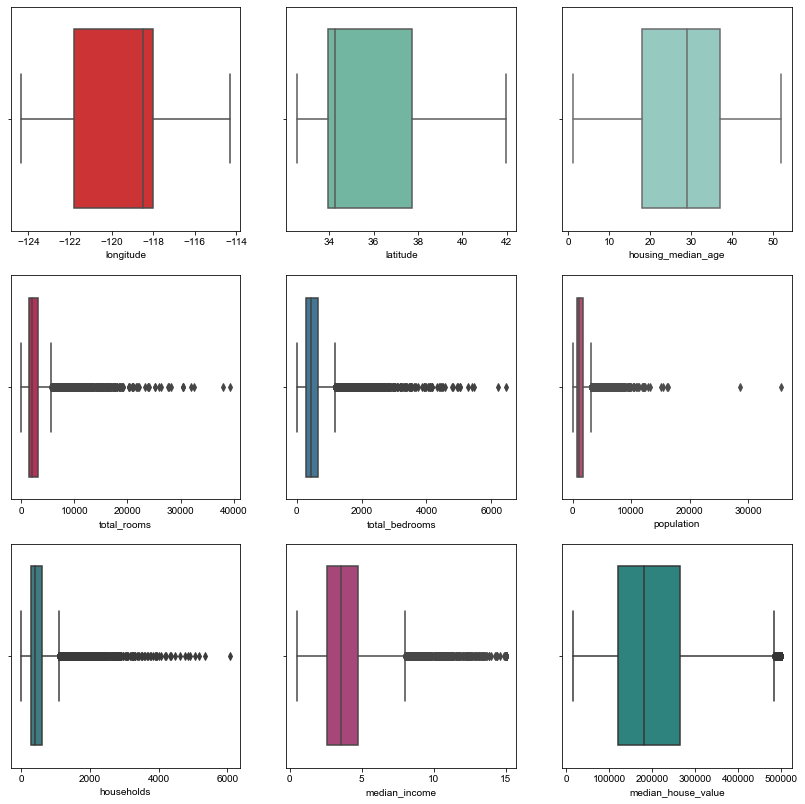

In [7]:
fig, axes = plt.subplots(3, 3, figsize=(14,14))
sns.set_theme(style="whitegrid")
sns.boxplot(x='longitude', data=df, ax=axes[0,0], palette="Set1")
sns.boxplot(x='latitude', data=df, ax=axes[0,1], palette="Set2")
sns.boxplot(x='housing_median_age', data=df, ax=axes[0,2], palette="Set3")
sns.boxplot(x='total_rooms', data=df, ax=axes[1,0], palette="rocket")
sns.boxplot(x='total_bedrooms', data=df, ax=axes[1,1], palette="mako")
sns.boxplot(x='population', data=df, ax=axes[1,2], palette="flare")
sns.boxplot(x='households', data=df, ax=axes[2,0], palette="crest")
sns.boxplot(x='median_income', data=df, ax=axes[2,1], palette="magma")
sns.boxplot(x='median_house_value', data=df, ax=axes[2,2], palette="viridis")

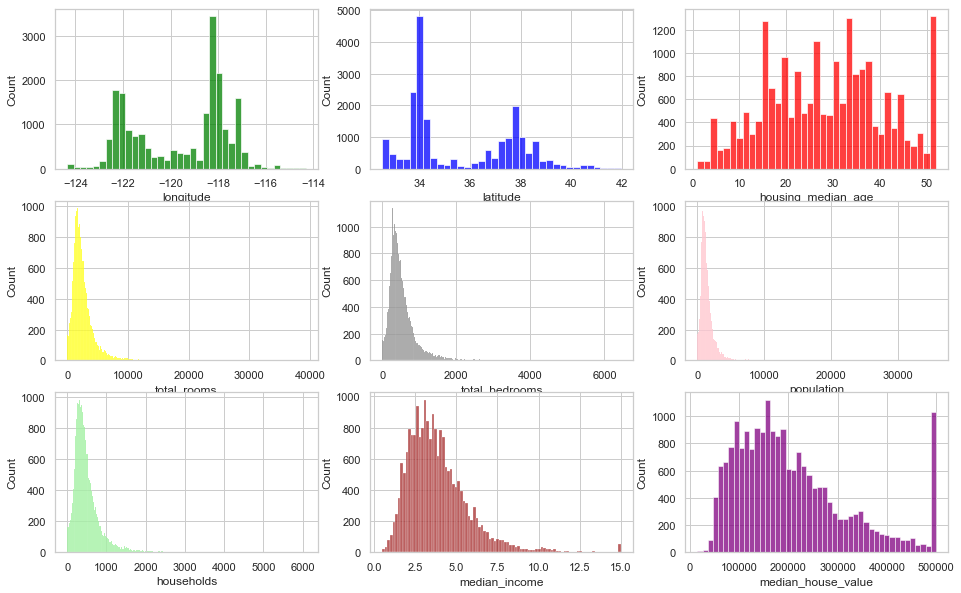

In [10]:
fig, axes = plt.subplots(3, 3, figsize=(16,10))
sns.histplot(data=df['longitude'], ax=axes[0, 0],color='green')
sns.histplot(data=df['latitude'], ax=axes[0, 1],color='Blue')
sns.histplot(data=df['housing_median_age'], ax=axes[0, 2],color='red')
sns.histplot(data=df['total_rooms'], ax=axes[1, 0],color='yellow')
sns.histplot(data=df['total_bedrooms'], ax=axes[1, 1],color='gray')
sns.histplot(data=df['population'], ax=axes[1, 2],color='pink')
sns.histplot(data=df['households'], ax=axes[2, 0],color='lightgreen')
sns.histplot(data=df['median_income'], ax=axes[2, 1],color='brown')
sns.histplot(data=df['median_house_value'], ax=axes[2, 2],color='purple')
plt.show()

## Multicollinearity of Features

### Pairplot

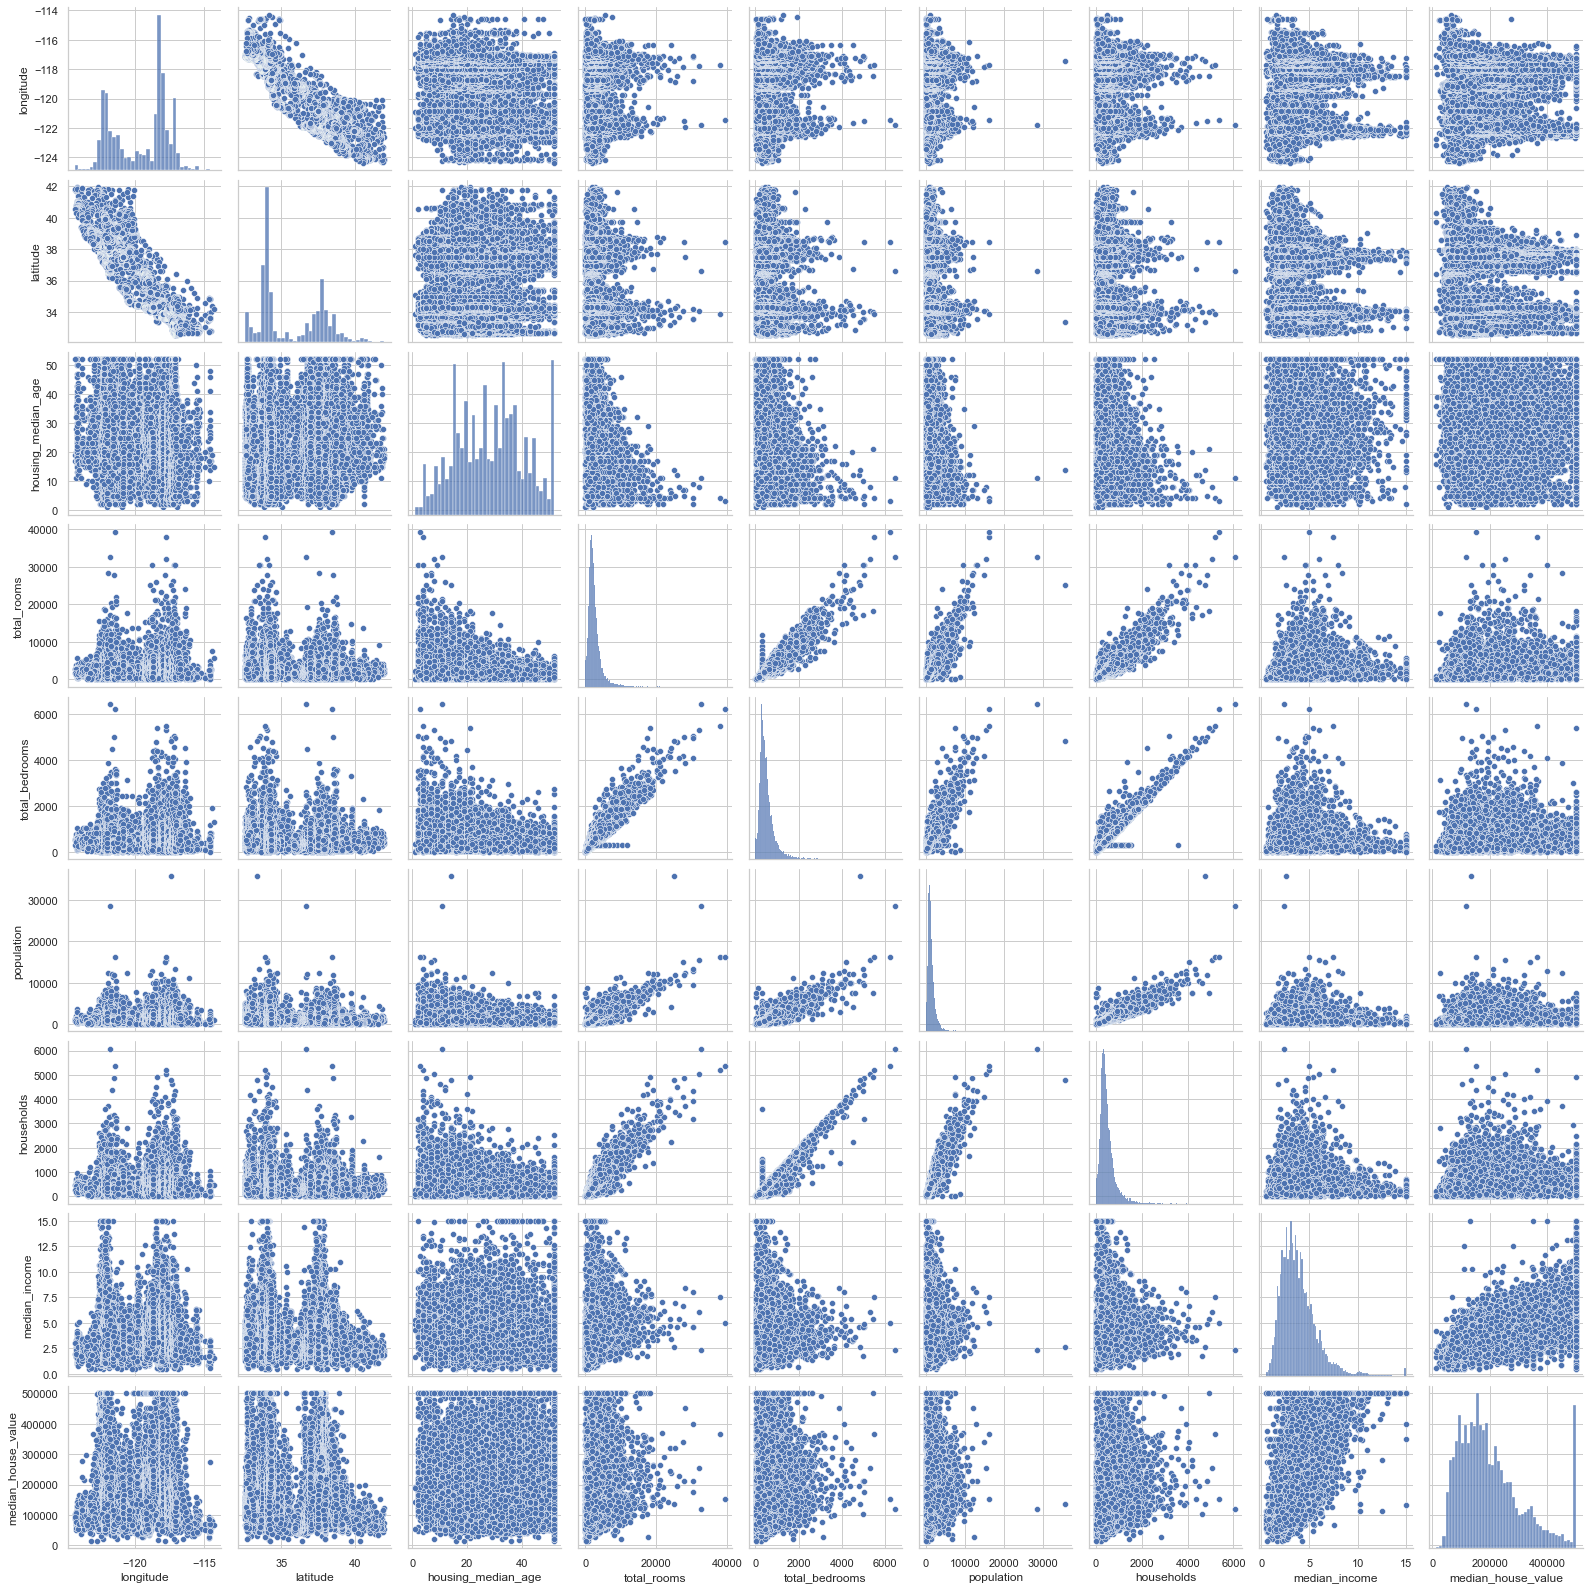

In [11]:
sns.pairplot(df)

### Scatterplots

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

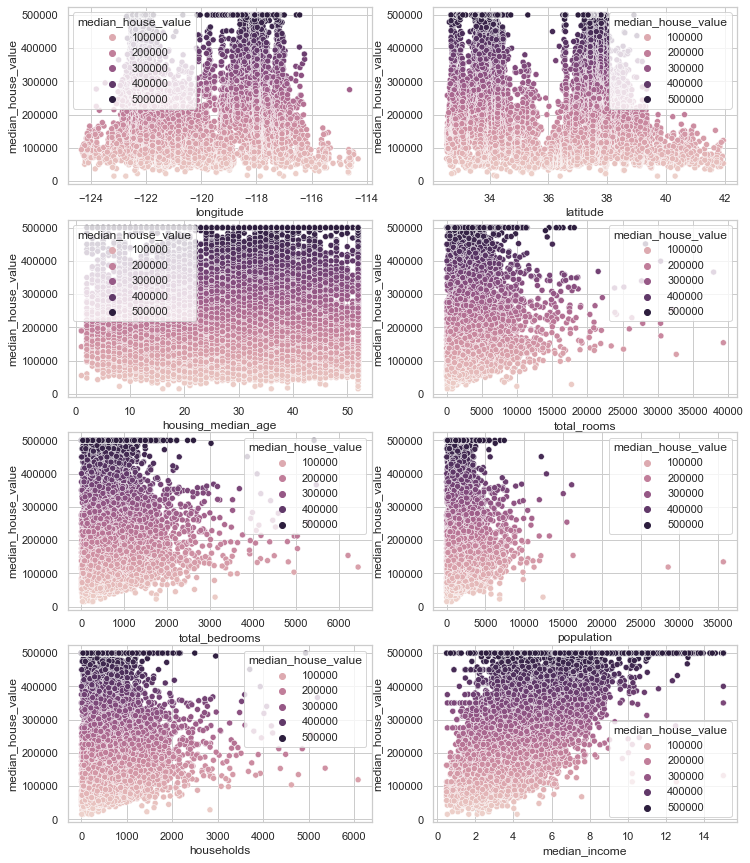

In [12]:
fig, axes = plt.subplots(4, 2, figsize=(12,15))
sns.scatterplot(x='longitude', y='median_house_value', data=df, hue='median_house_value', ax=axes[0,0])
sns.scatterplot(x='latitude', y='median_house_value', data=df, hue='median_house_value', ax=axes[0,1])
sns.scatterplot(x='housing_median_age', y='median_house_value', data=df, hue='median_house_value', ax=axes[1,0])
sns.scatterplot(x='total_rooms', y='median_house_value', data=df, hue='median_house_value', ax=axes[1,1])
sns.scatterplot(x='total_bedrooms', y='median_house_value', data=df, hue='median_house_value', ax=axes[2,0])
sns.scatterplot(x='population', y='median_house_value', data=df, hue='median_house_value', ax=axes[2,1])
sns.scatterplot(x='households', y='median_house_value', data=df, hue='median_house_value', ax=axes[3,0])
sns.scatterplot(x='median_income', y='median_house_value', data=df, hue='median_house_value', ax=axes[3,1])

### Heatmap

<AxesSubplot:>

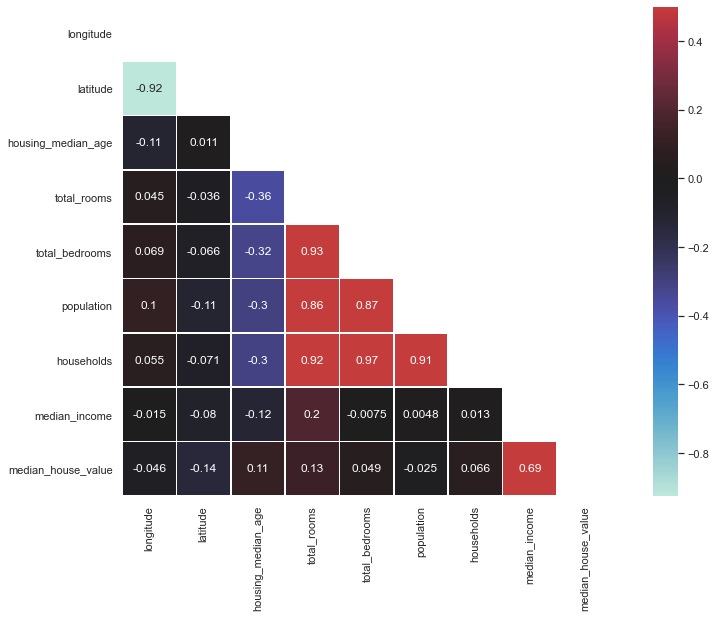

In [13]:
fig = plt.figure(figsize = (15,9))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask, vmax=.5, center=0, square=True, linewidths=.5, annot=True)

# Data Preprocessing

## Creating dummy variables

In [14]:
df=pd.get_dummies(df)

In [15]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0


## Shifting the target variable 

In [16]:
target=df.pop("median_house_value")

In [17]:
df.insert(len(df.columns),'target',pd.DataFrame(target))

In [18]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,target
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,0,0,1,0,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0,0,0,1,0,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0,0,0,1,0,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0,0,0,1,0,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0,0,0,1,0,342200


## Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[:8] = sc.fit_transform(df[:8])

In [20]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,target
0,1.147079,2.293659,-0.554096,-0.768149,-0.919076,-0.860152,-0.874639,1.382252,0.0,0.0,0.0,0.0,0.0,2.000756
1,2.064742,0.625543,-2.481387,2.452833,2.208263,2.369204,2.251665,1.370510,0.0,0.0,0.0,0.0,0.0,0.438016
2,0.229416,-0.208514,0.505914,-0.464126,-0.723817,-0.589874,-0.717088,0.855412,0.0,0.0,0.0,0.0,0.0,0.331729
3,-0.688247,-0.208514,0.505914,-0.564086,-0.579774,-0.493568,-0.587341,0.058935,0.0,0.0,0.0,0.0,0.0,0.152371
4,-0.688247,-0.208514,0.505914,-0.381258,-0.435731,-0.482695,-0.463771,-0.827634,0.0,0.0,0.0,0.0,0.0,0.167318


## Train Test Split

In [21]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2, random_state=0)

In [22]:
train.shape

(16512, 14)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12069 to 2732
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   16512 non-null  float64
 1   latitude                    16512 non-null  float64
 2   housing_median_age          16512 non-null  float64
 3   total_rooms                 16512 non-null  float64
 4   total_bedrooms              16512 non-null  float64
 5   population                  16512 non-null  float64
 6   households                  16512 non-null  float64
 7   median_income               16512 non-null  float64
 8   ocean_proximity_<1H OCEAN   16512 non-null  float64
 9   ocean_proximity_INLAND      16512 non-null  float64
 10  ocean_proximity_ISLAND      16512 non-null  float64
 11  ocean_proximity_NEAR BAY    16512 non-null  float64
 12  ocean_proximity_NEAR OCEAN  16512 non-null  float64
 13  target                      

In [24]:
X_train=train.drop(['target'], axis=1)

In [25]:
y_train=train['target']

In [26]:
X_test=test.drop(['target'], axis=1)

In [27]:
y_test=test['target']

## Feature Importance

In [29]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X_train,y_train)

ExtraTreesRegressor()

In [31]:
for (i, j) in zip(X_train.columns,model.feature_importances_):
    print(i,":", j)

longitude : 0.08038924395663165
latitude : 0.06702145369383905
housing_median_age : 0.061163586637617985
total_rooms : 0.032223087240772635
total_bedrooms : 0.036083036403959004
population : 0.047912979163394764
households : 0.03294892712063196
median_income : 0.4059170698360677
ocean_proximity_<1H OCEAN : 0.005728188180592563
ocean_proximity_INLAND : 0.21879897165155363
ocean_proximity_ISLAND : 0.0003905611886804749
ocean_proximity_NEAR BAY : 0.004267690794531778
ocean_proximity_NEAR OCEAN : 0.007155204131726898


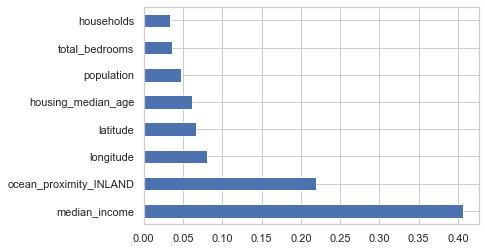

In [32]:
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

# Model Building

In [37]:
models = []
models.append(('LR', LinearRegression()))
models.append(('DT', DecisionTreeRegressor(criterion="mse")))
models.append(('KNN', KNeighborsRegressor(n_neighbors=1)))
models.append(('RR', Ridge()))
models.append(('LA', Lasso()))
models.append(('RFR', RandomForestRegressor()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = RepeatedKFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.645182 (0.021656)
DT: 0.643667 (0.021692)
KNN: -0.190881 (0.043482)
RR: 0.636275 (0.020852)
LA: 0.635881 (0.020845)
RFR: 0.818654 (0.010766)
XGB: nan (nan)


## Hyperparameter Tuning

As pe the R2 score, RFR is the best fitted model on the dataset.<br>
Therefore, we will perform Hyperparameter Tuning on RFR to get better results.

### Random Forest Regressor

In [38]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 800, num = 8)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 25, num = 5)]
random_grid = {'n_estimators': n_estimators, 'max_depth': max_depth}

In [39]:
rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = random_grid,
                               scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=0, n_jobs = -1)

In [40]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   55.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 24.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=2)

In [41]:
rf_random.best_params_

{'n_estimators': 800, 'max_depth': 25}

In [43]:
predictions=rf_random.predict(X_test)

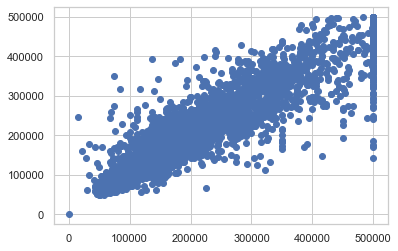

In [44]:
plt.scatter(y_test,predictions)

In [45]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 31277.343965079814
MSE: 2270734612.818471
RMSE: 47652.22568588451


In [46]:
metrics.r2_score(y_test, predictions)

0.8259898532225484